In [1]:
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 


In [2]:
#stock_list = yf.Ticker["ANZ.AX", "WBC.AX", "CBA.AX", "NAB.AX", "MQG.AX"]

In [3]:
#hist = stock_list.history

In [4]:
fin_stk = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "ANZ.AX WBC.AX CBA.AX NAB.AX MQG.AX",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "6mo",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  5 of 5 completed


In [17]:
fin_stk.columns

MultiIndex([('WBC.AX',   'Open'),
            ('WBC.AX',   'High'),
            ('WBC.AX',    'Low'),
            ('WBC.AX',  'Close'),
            ('WBC.AX', 'Volume'),
            ('NAB.AX',   'Open'),
            ('NAB.AX',   'High'),
            ('NAB.AX',    'Low'),
            ('NAB.AX',  'Close'),
            ('NAB.AX', 'Volume'),
            ('MQG.AX',   'Open'),
            ('MQG.AX',   'High'),
            ('MQG.AX',    'Low'),
            ('MQG.AX',  'Close'),
            ('MQG.AX', 'Volume'),
            ('ANZ.AX',   'Open'),
            ('ANZ.AX',   'High'),
            ('ANZ.AX',    'Low'),
            ('ANZ.AX',  'Close'),
            ('ANZ.AX', 'Volume'),
            ('CBA.AX',   'Open'),
            ('CBA.AX',   'High'),
            ('CBA.AX',    'Low'),
            ('CBA.AX',  'Close'),
            ('CBA.AX', 'Volume')],
           )

In [22]:
fin_stk = fin_stk.columns.to_flat_index()
fin_stk.head()

AttributeError: 'Index' object has no attribute 'columns'

In [ ]:
nab_stk = fin_stk.iloc[:,23]
maq_stk = fin_stk.iloc[:,3]
anz_stk = fin_stk.iloc[:,18]
wst_stk = fin_stk.iloc[:,13]
cba_stk = fin_stk.iloc[:,8]

In [ ]:
fin_stk_cl= pd.DataFrame({"Nab Close":nab_stk, 
                          "CBA Close": cba_stk,
                         "ANZ Close": anz_stk,
                         "Westpac Close":wst_stk,
                         "Maq Close": maq_stk})
fin_stk_cl

In [ ]:
#fin_stk_cl.to_csv("tofivestk.csv", sep=",")


In [23]:
five_stk = pd.read_csv("tofivestk.csv")
five_stk.head()

,Date,Nab Close,CBA Close,ANZ Close,Westpac Close,Maq Close
0,2020-01-07,24.459551,79.400749,24.950001,24.620001,137.120224
1,2020-01-08,24.380966,79.107399,24.860001,24.540001,136.127533
2,2020-01-09,24.390789,79.684326,24.889999,24.469999,136.746735
3,2020-01-10,24.489021,80.671951,25.120001,24.650000,137.945847
4,2020-01-13,24.489021,80.652397,25.010000,24.590000,137.110397


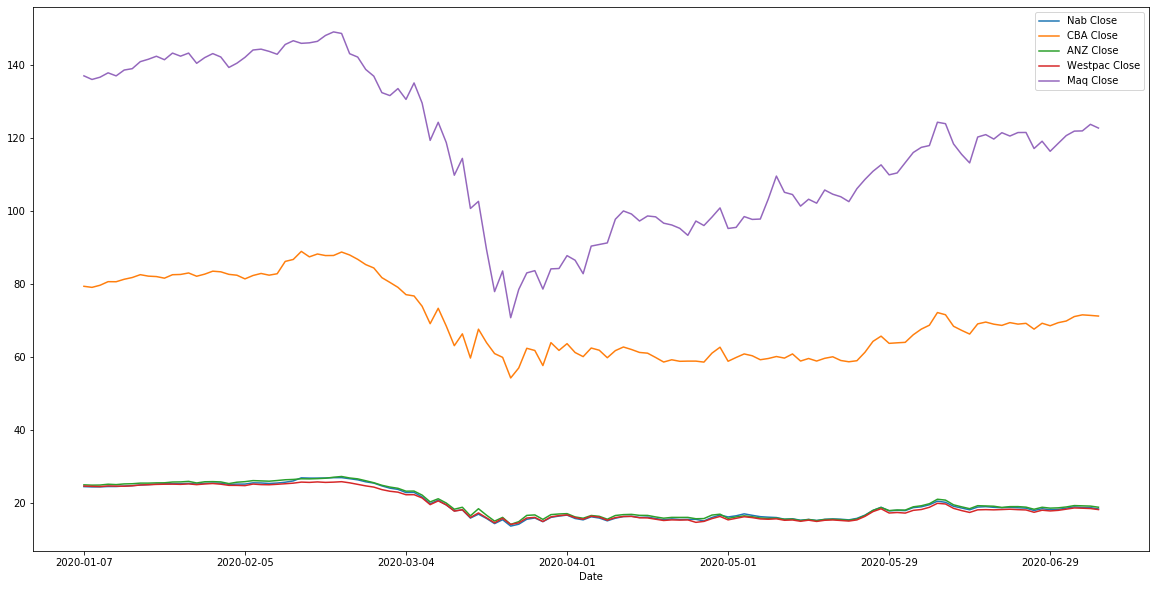

In [24]:

five_stk.plot("Date", figsize=(20,10))

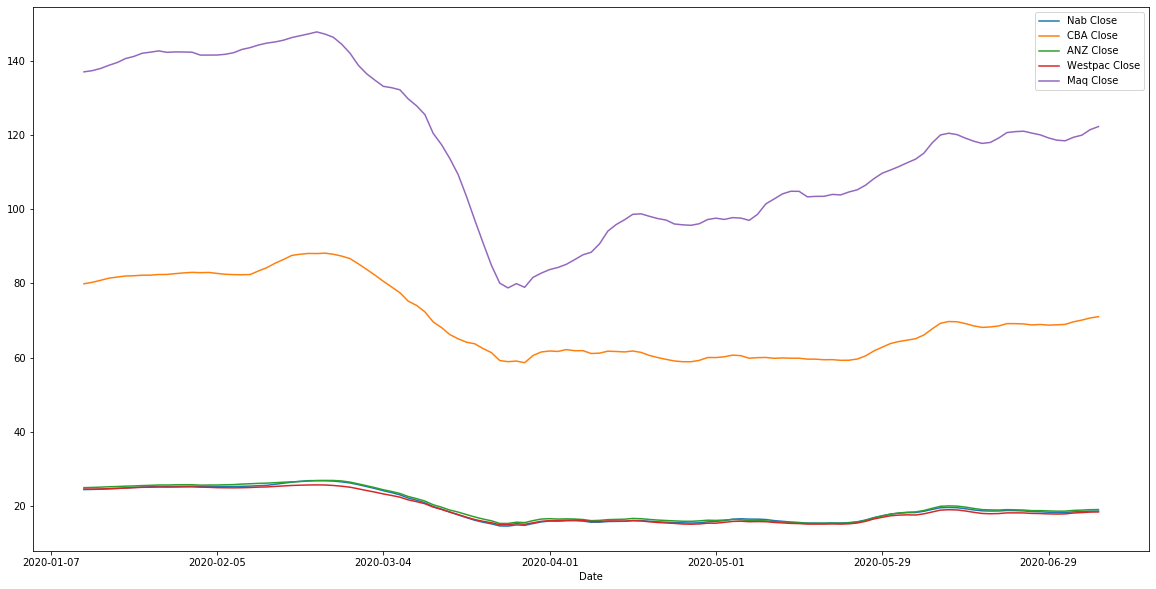

In [28]:
five_stk.set_index("Date").rolling(5).mean().plot(figsize=(20,10))